from PIL import Image
from matplotlib  import image
from os import listdir
from torchvision import transforms, datasets as ds
from torchvision import models
import torchvision as tv
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

c:\users\weidian\appdata\local\programs\python\python37\lib\site-packages\torchvision\transforms\transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


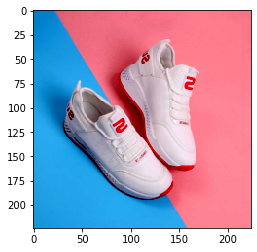

In [2]:
transform = transforms.Compose(
    [        
        transforms.Scale(224),
#         transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])   #标准化

train_set = tv.datasets.ImageFolder(root='C:/Users/weidian/Desktop/pic爬虫微点购/train',transform=transform)
train_data_loader = DataLoader(dataset=train_set,batch_size=10, shuffle=True,pin_memory=True)

test_set = tv.datasets.ImageFolder(root='C:/Users/weidian/Desktop/pic爬虫微点购/test',transform=transform)
test_data_loader = DataLoader(dataset=test_set,batch_size=10, shuffle=True,pin_memory=True)

to_pil_image = transforms.ToPILImage()
i = 1
for image,label in train_data_loader:
      ·
#     print(label)
#     print(image,label)
    if i > 1:
        break
  
    #方法2：plt.imshow(ndarray)
    img = image[0]  # plt.imshow()只能接受3-D Tensor，所以也要用image[0]消去batch那一维
#     print(img.shape)
    img = img.numpy()  # FloatTensor转为ndarray
    img = np.transpose(img, (1, 2, 0))  # 把channel那一维放到最后
#     # 显示图片
    plt.imshow(img)
    plt.show()
    i = i+1

In [4]:
train_set.class_to_idx
# train_data_loader

{'运动鞋': 0, '靴子': 1, '高跟鞋': 2}

In [5]:
import torch.nn as nn
import torch.nn.functional as F
    

class Net(nn.Module):
    def __init__(self, num_classes=3):   #num_classes，此处为 二分类值为3
        super(Net, self).__init__()
        net = models.vgg16(pretrained=True)   #从预训练模型加载VGG16网络参数
        net.classifier = nn.Sequential()#将分类层置空，下面将改变我们的分类层
        self.features = net#保留VGG16的特征层
        self.classifier = nn.Sequential(    #定义自己的分类层
                nn.Linear(512 * 7 * 7, 512),  #512 * 7 * 7不能改变 ，由VGG16网络决定的，第二个参数为神经元个数可以微调
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(512, 128),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    
net = Net()


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
 


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

nums_epoch = 8
for epoch in range(nums_epoch):
    _loss = 0.0
    for i, (inputs, labels) in enumerate(train_data_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _loss += loss.item()
        if i % 50000 :    # 每2000步打印一次损失值
#             print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, _loss / 2000))
#             _loss = 0.0
            
            print('train epoch:{},，loss:{}'.format(epoch,loss.item()))

print('Finished Training')



cpu
train epoch:0,，loss:1.1281136274337769
train epoch:0,，loss:1.0700881481170654
train epoch:0,，loss:1.1732412576675415
train epoch:0,，loss:1.0166374444961548
train epoch:0,，loss:1.0507419109344482
train epoch:0,，loss:1.0884032249450684
train epoch:0,，loss:1.179328203201294
train epoch:0,，loss:0.9754267930984497
train epoch:0,，loss:1.009894609451294
train epoch:0,，loss:1.0525507926940918
train epoch:0,，loss:1.05782949924469
train epoch:0,，loss:0.9650198221206665
train epoch:0,，loss:0.9118887782096863
train epoch:0,，loss:1.1304550170898438
train epoch:0,，loss:0.9177862405776978
train epoch:0,，loss:0.945788562297821
train epoch:0,，loss:1.0630459785461426
train epoch:0,，loss:1.1042897701263428
train epoch:0,，loss:0.8108795881271362
train epoch:0,，loss:1.0691756010055542
train epoch:0,，loss:0.9311891794204712
train epoch:0,，loss:0.8644420504570007
train epoch:0,，loss:0.9233900904655457
train epoch:0,，loss:0.6937088370323181
train epoch:0,，loss:0.9963446855545044
train epoch:0,，loss:0.8149

train epoch:3,，loss:0.15600164234638214
train epoch:3,，loss:0.011178379878401756
train epoch:3,，loss:0.012034842744469643
train epoch:3,，loss:0.008185012266039848
train epoch:3,，loss:0.04180041328072548
train epoch:3,，loss:0.03579939156770706
train epoch:3,，loss:0.06372334808111191
train epoch:3,，loss:0.12114224582910538
train epoch:3,，loss:0.11305829137563705
train epoch:3,，loss:0.012317752465605736
train epoch:3,，loss:0.025102203711867332
train epoch:3,，loss:0.017855724319815636
train epoch:3,，loss:0.032455164939165115
train epoch:3,，loss:0.005315688438713551
train epoch:3,，loss:0.05920301750302315
train epoch:3,，loss:0.060062505304813385
train epoch:3,，loss:0.014832234010100365
train epoch:3,，loss:0.0012050771620124578
train epoch:3,，loss:0.014817106537520885
train epoch:3,，loss:0.00023299999884329736
train epoch:4,，loss:0.11649225652217865
train epoch:4,，loss:0.10132869333028793
train epoch:4,，loss:0.044563595205545425
train epoch:4,，loss:0.0006455440889112651
train epoch:4,，loss:0

train epoch:7,，loss:0.020675010979175568
train epoch:7,，loss:0.015784282237291336
train epoch:7,，loss:0.013454442843794823
train epoch:7,，loss:0.010630594566464424
train epoch:7,，loss:0.003112435108050704
train epoch:7,，loss:0.003319884417578578
train epoch:7,，loss:0.008398802950978279
train epoch:7,，loss:0.01582873985171318
train epoch:7,，loss:0.001573295914568007
train epoch:7,，loss:0.006502336356788874
train epoch:7,，loss:0.00038379308534786105
train epoch:7,，loss:0.0042841932736337185
train epoch:7,，loss:0.0010550502920523286
train epoch:7,，loss:0.000939639110583812
train epoch:7,，loss:0.0018931208178400993
train epoch:7,，loss:0.09449125081300735
train epoch:7,，loss:0.005512595176696777
train epoch:7,，loss:0.005236479453742504
train epoch:7,，loss:0.013224084861576557
train epoch:7,，loss:0.0013224197318777442
train epoch:7,，loss:0.005016267765313387
train epoch:7,，loss:0.0011089994804933667
train epoch:7,，loss:0.00047576380893588066
train epoch:7,，loss:0.004050598479807377
train epo

In [7]:
correct = 0
total = 0
dataiter = iter(train_data_loader)
# dataiter = iter(test_data_loader)
with torch.no_grad():
    for data in dataiter:
        images, labels = data
        print(labels)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
#         print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  

print('Accuracy of the network on the 10000 train images: %d %%' % (
        100 * correct / total))
torch.save(net, 'vgg_model.pth')

tensor([2, 2, 2, 1, 2, 0, 1, 0, 2, 0])
tensor([2, 2, 2, 1, 2, 0, 1, 0, 2, 0])
tensor([2, 0, 1, 0, 2, 0, 0, 1, 0, 0])
tensor([2, 0, 1, 0, 0, 0, 0, 1, 0, 0])
tensor([1, 2, 2, 0, 0, 2, 2, 0, 0, 2])
tensor([1, 2, 2, 0, 0, 2, 2, 0, 0, 2])
tensor([2, 2, 2, 2, 0, 1, 2, 0, 1, 0])
tensor([2, 2, 2, 2, 0, 1, 2, 0, 1, 0])
tensor([0, 2, 2, 2, 2, 2, 0, 0, 0, 2])
tensor([0, 2, 2, 2, 2, 2, 0, 0, 0, 2])
tensor([2, 0, 1, 0, 2, 2, 1, 0, 2, 2])
tensor([2, 0, 1, 0, 2, 2, 1, 0, 2, 2])
tensor([0, 1, 1, 0, 2, 0, 2, 1, 1, 0])
tensor([0, 1, 1, 0, 2, 0, 2, 1, 1, 0])
tensor([1, 0, 1, 0, 0, 0, 2, 0, 2, 1])
tensor([1, 0, 1, 0, 0, 0, 2, 0, 0, 1])
tensor([0, 1, 1, 0, 1, 1, 2, 2, 0, 0])
tensor([0, 1, 1, 0, 1, 1, 2, 2, 0, 0])
tensor([0, 2, 0, 2, 0, 2, 0, 2, 0, 1])
tensor([0, 2, 0, 2, 0, 2, 0, 2, 0, 1])
tensor([0, 1, 1, 2, 0, 0, 0, 0, 2, 2])
tensor([0, 1, 1, 2, 0, 0, 0, 0, 2, 2])
tensor([0, 0, 0, 0, 1, 2, 2, 2, 2, 2])
tensor([0, 0, 0, 0, 1, 2, 2, 2, 2, 2])
tensor([0, 0, 0, 2, 2, 0, 0, 0, 1, 2])
tensor([0, 0, 0, 2, 2, 0,

In [1]:

model = torch.load('vgg_model.pth')  # 加载模型
model = model.to(device)
model.eval()  # 把模型转为test模式

img = Image.open("C:/Users/weidian/Desktop/pic爬虫微点购/ts/1.png")  # 读取要预测的图片
img = img.convert("RGB")
img.save("C:/Users/weidian/Desktop/pic爬虫微点购/ts/1.png")
trans = transforms.Compose(
    [   transforms.Scale(224),
        transforms.ToTensor(),
    ])

img = trans(img)
img = img.unsqueeze(0)#增加一维，输出的img格式为[1,C,H,W]
print(img.shape)
img = img.to(device)

output = model(img)
prob = F.softmax(output,dim=1) #prob是3个分类的概率

classes = ['运动鞋','靴子','高跟鞋']


from torch.autograd import Variable
value, predicted = torch.max(output, 1)
pred_class = classes[predicted.item()]
print(pred_class)


NameError: name 'torch' is not defined

In [ ]:

inception.data_dir = 'inception/'
inception.maybe_download()